### IDs:
Insert yours IDs to the cell below

ID #1:305073330

ID #2:204710156


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import multivariate_normal as mn
import timeit
from scipy import stats
import random

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

pearsons correlation for n-1 points: 1.000

table of the dataset:


,X,Y
0,32,32
1,95,95
2,36,36
3,36,36
4,64,64
5,22,22
6,74,74
7,41,41
8,96,96
9,97,97


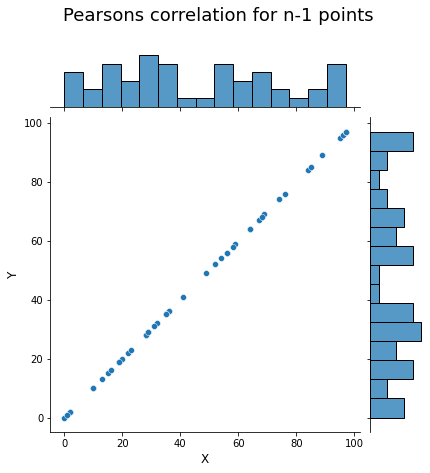

In [14]:
x = np.random.randint(0,100, size = 49)
y = x 

pearson_before_one, _ = scipy.stats.pearsonr(x, y)
print('pearsons correlation for n-1 points: %.3f\n' % pearson_before_one)

xy_dataset = pd.DataFrame({'X': x, 'Y':y}, columns=['X', 'Y'])
ax = sns.jointplot(data=xy_dataset, x='X', y='Y', kind="scatter", marginal_kws=dict(bins=15))
ax.set_axis_labels('X', 'Y', fontsize=12)
ax.fig.suptitle("Pearsons correlation for n-1 points", y=1.08, fontsize=18)
print('table of the dataset:')
xy_dataset.head(51)


pearsons correlation for all n points: -0.979

table of the dataset:


,X,Y
0,32,32
1,95,95
2,36,36
3,36,36
4,64,64
5,22,22
6,74,74
7,41,41
8,96,96
9,97,97


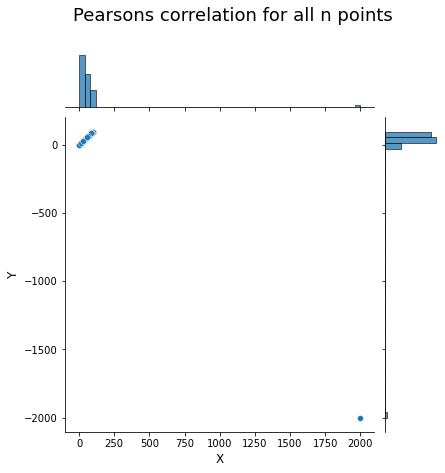

In [15]:
x_plus_one = np.append(x, 2000)
y_plus_one = np.append(y, -2000)
pearson_plus_one, _ = scipy.stats.pearsonr(x_plus_one, y_plus_one)
print('pearsons correlation for all n points: %.3f\n' % pearson_plus_one)

xy_plus_one_dataset = pd.DataFrame({'X': x_plus_one, 'Y':y_plus_one}, columns=['X', 'Y'])
ax = sns.jointplot(data=xy_plus_one_dataset, x='X', y='Y', kind="scatter", marginal_kws=dict(bins=50))
ax.set_axis_labels('X', 'Y', fontsize=12)
ax.fig.suptitle("Pearsons correlation for all n points", y=1.08, fontsize=18)
print('table of the dataset:')
xy_plus_one_dataset.head(51)

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

kendall correlation: 0.006

spearman correlation: -0.462

table of the dataset:


,X,Y
0,1,200
1,2,400
2,3,600
3,4,800
4,5,1000
5,6,1200
6,7,1400
7,8,1600
8,9,1800
9,10,2000


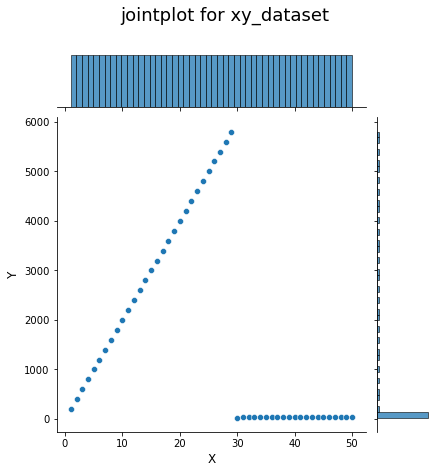

In [16]:
x = np.arange(1, 51)
y = x
y = np.where((x<30), y*200, y)

kendall, _ = scipy.stats.kendalltau(x, y)
print('kendall correlation: %.3f\n' % kendall)
spearman, _ = scipy.stats.spearmanr(x, y)
print('spearman correlation: %.3f\n' % spearman)

xy_dataset = pd.DataFrame({'X': x, 'Y':y}, columns=['X', 'Y'])
ax = sns.jointplot(data=xy_dataset, x='X', y='Y', kind="scatter", marginal_kws=dict(bins=50))
ax.set_axis_labels('X', 'Y', fontsize=12)
ax.fig.suptitle("jointplot for xy_dataset", y=1.08, fontsize=18)
print('table of the dataset:')
xy_dataset.head(51)


#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

kendall correlation: -0.006

spearman correlation: 0.462

table of the dataset:


,X,Y
0,1,-200
1,2,-400
2,3,-600
3,4,-800
4,5,-1000
5,6,-1200
6,7,-1400
7,8,-1600
8,9,-1800
9,10,-2000


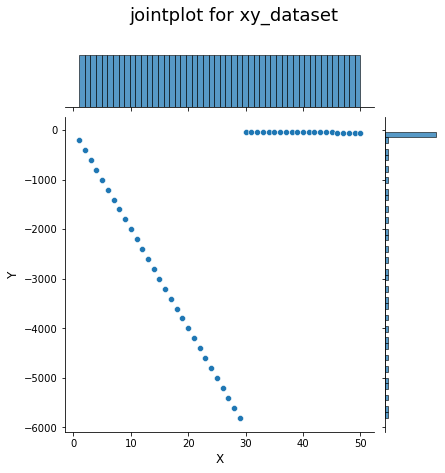

In [18]:
x = np.arange(1, 51)
y = x
y = np.where((x<30), y*-200, -y)

kendall, _ = scipy.stats.kendalltau(x, y)
print('kendall correlation: %.3f\n' % kendall)
spearman, _ = scipy.stats.spearmanr(x, y)
print('spearman correlation: %.3f\n' % spearman)

xy_dataset = pd.DataFrame({'X': x, 'Y':y}, columns=['X', 'Y'])
ax = sns.jointplot(data=xy_dataset, x='X', y='Y', kind="scatter", marginal_kws=dict(bins=50))
ax.set_axis_labels('X', 'Y', fontsize=12)
ax.fig.suptitle("jointplot for xy_dataset", y=1.08, fontsize=18)
print('table of the dataset:')
xy_dataset.head(51)

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

pearson correlation: 0.379

spearman correlation: 1.000

table of the dataset:


,X,Y
0,0.000000,0.000000e+00
1,0.020408,2.466930e-68
2,0.040816,2.712418e-56
3,0.061224,2.999211e-49
4,0.081633,2.982335e-44
5,0.102041,2.243660e-40
6,0.122449,3.297667e-37
7,0.142857,1.570646e-34
8,0.163265,3.279112e-32
9,0.183673,3.646340e-30


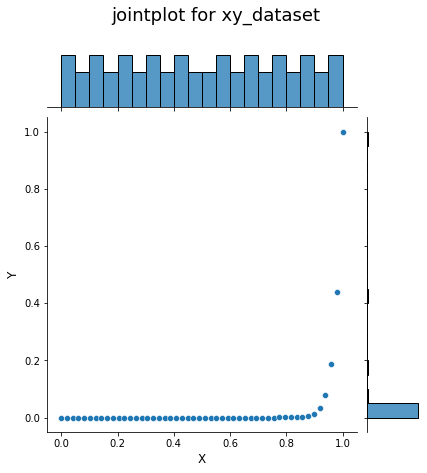

In [19]:
x = np.linspace(0.0, 1.0, 50)
y = np.power(x, 40)

pearson, _ = scipy.stats.pearsonr(x, y)
print('pearson correlation: %.3f\n' % pearson)
spearman, _ = scipy.stats.spearmanr(x, y)
print('spearman correlation: %.3f\n' % spearman)

xy_dataset = pd.DataFrame({'X': x, 'Y':y}, columns=['X', 'Y'])
ax = sns.jointplot(data=xy_dataset, x='X', y='Y', kind="scatter", marginal_kws=dict(bins=20))
ax.set_axis_labels('X', 'Y', fontsize=12)
ax.fig.suptitle("jointplot for xy_dataset", y=1.08, fontsize=18)
print('table of the dataset:')
xy_dataset.head(51)

#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

pearson correlation: 0.754

spearman correlation: -0.885

table of the dataset:


,X,Y
0,0,50
1,1,49
2,2,48
3,3,47
4,4,46
5,5,45
6,6,44
7,7,43
8,8,42
9,9,41


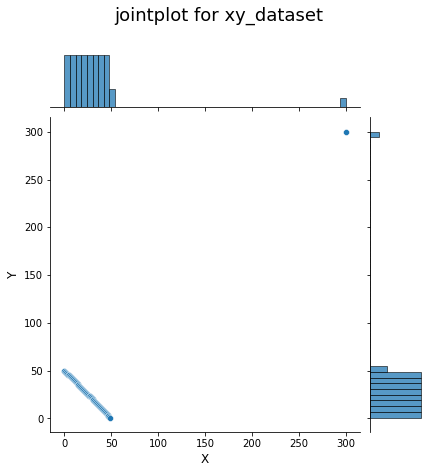

In [20]:
x = np.arange(0, 50)
y = np.arange(50, 0, -1)
x_plus = np.append(x, 300)
y_plus = np.append(y, 300)

pearson, _ = scipy.stats.pearsonr(x_plus, y_plus)
print('pearson correlation: %.3f\n' % pearson)
spearman, _ = scipy.stats.spearmanr(x_plus, y_plus)
print('spearman correlation: %.3f\n' % spearman)

xy_dataset = pd.DataFrame({'X': x_plus, 'Y':y_plus}, columns=['X', 'Y'])
ax = sns.jointplot(data=xy_dataset, x='X', y='Y', kind="scatter", marginal_kws=dict(bins=50))
ax.set_axis_labels('X', 'Y', fontsize=12)
ax.fig.suptitle("jointplot for xy_dataset", y=1.08, fontsize=18)
print('table of the dataset:')
xy_dataset.head(51)

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

#### Answer:
The situation is impossible. 
Both kendall and spearman correlations based on the rank of the data.
It is not possible to have such a big difference between the two correlations that measure monotonicity relationships.

1.2 gap means that we got strong positive correlation in one measurement and weak/strong negative correlation in the other or strong negative correlation in one measurement and weak/strong positive correlation in the other.
On rank based correlations this gap is impossible.

### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


In [14]:
#load the dataset
df_heart = pd.read_csv('heart.csv', delimiter='\t') 
df_heart.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0,1.4,2,0,2,1
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1
5,NaN,1.0,0.0,140.0,192.0,0.0,1.0,NaN,0,0.4,1,0,1,1
6,56.0,0.0,1.0,140.0,294.0,0.0,0.0,153.0,0,1.3,1,0,2,1
7,44.0,1.0,1.0,120.0,263.0,0.0,1.0,173.0,0,0.0,2,0,3,1
8,52.0,1.0,2.0,172.0,199.0,1.0,1.0,162.0,0,NaN,2,0,3,1
9,57.0,1.0,2.0,150.0,168.0,0.0,1.0,174.0,0,1.6,2,0,2,1


In [22]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       295 non-null    float64
 1   sex       299 non-null    float64
 2   cp        298 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       300 non-null    float64
 6   restecg   301 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   298 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 33.3 KB


In [15]:
#find missing values in dataset

#only numerical columns
df_heart_num = df_heart[['age','trestbps', 'chol', 'thalach', 'oldpeak']]
#only categorcial columns
df_heart_cat = df_heart[['sex','cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]

print("number of missing values per each feature\n")

for col in df_heart_num.columns: 
    print("the number of missing values in '{}' feature is: {}".format(col, sum(pd.isna(df_heart[col]))))
    median = np.nanmedian(df_heart_num[col])
    df_heart[col] = df_heart[col].fillna(median)
    print("the number of missing values after fixing in '{}' feature is: {}\n".format(col, sum(pd.isna(df_heart[col]))))

for col in df_heart_cat.columns: 
    print("the number of missing values in '{}' feature is: {}".format(col, sum(pd.isna(df_heart[col]))))
    mode = df_heart_cat[col].mode()[0]
    df_heart[col] = df_heart[col].fillna(mode)
    print("the number of missing values after fixing in '{}' feature is: {}\n".format(col, sum(pd.isna(df_heart[col]))))

number of missing values per each feature

the number of missing values in 'age' feature is: 8
the number of missing values after fixing in 'age' feature is: 0

the number of missing values in 'trestbps' feature is: 6
the number of missing values after fixing in 'trestbps' feature is: 0

the number of missing values in 'chol' feature is: 6
the number of missing values after fixing in 'chol' feature is: 0

the number of missing values in 'thalach' feature is: 4
the number of missing values after fixing in 'thalach' feature is: 0

the number of missing values in 'oldpeak' feature is: 5
the number of missing values after fixing in 'oldpeak' feature is: 0

the number of missing values in 'sex' feature is: 4
the number of missing values after fixing in 'sex' feature is: 0

the number of missing values in 'cp' feature is: 5
the number of missing values after fixing in 'cp' feature is: 0

the number of missing values in 'fbs' feature is: 3
the number of missing values after fixing in 'fbs' fe

#### Question 1:
Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean.

#### Answer 1:

In [29]:
alpha = 0.05
z = scipy.stats.norm.ppf(1-alpha/2)
health_data = df_heart[df_heart['target'] == 0]
health_size = health_data['target'].count() 
disease_data = df_heart[df_heart['target'] == 1]
disease_size = disease_data['target'].count()

for col in df_heart_num.columns: 
    h_mean = health_data[col].mean()
    h_std = health_data[col].std()
    d_mean = disease_data[col].mean()
    d_std = disease_data[col].std()
    SE = np.sqrt(h_std**2 / health_size + d_std**2 / disease_size)
    conf_int = (h_mean-d_mean - SE*z , h_mean-d_mean + SE*z)    
    print("feature '{}' confidence interval of difference of means (healthy-disease) is {} to {}".format(col, round(conf_int[0], 2), round(conf_int[1], 2)))
    if (conf_int[0] > 0):
        print ("healthy population mean is larger than disease population mean in 95% confidence\n")
    elif (conf_int[1] < 0):
        print ("healthy population mean is smaller than disease population mean in 95% confidence\n")
    else:
        print ("we can't say in 95% confidence that healthy population mean is smaller/larger than disease population mean\n")

feature 'age' confidence interval of difference of means (healthy-disease) is 2.21 to 6.1
healthy population mean is larger than disease population mean in 95% confidence

feature 'trestbps' confidence interval of difference of means (healthy-disease) is 1.14 to 9.03
healthy population mean is larger than disease population mean in 95% confidence

feature 'chol' confidence interval of difference of means (healthy-disease) is -2.89 to 20.24
we can't say in 95% confidence that healthy population mean is smaller/larger than disease population mean

feature 'thalach' confidence interval of difference of means (healthy-disease) is -24.11 to -14.59
healthy population mean is smaller than disease population mean in 95% confidence

feature 'oldpeak' confidence interval of difference of means (healthy-disease) is 0.73 to 1.23
healthy population mean is larger than disease population mean in 95% confidence



#### Conclusion:

features 'age','oldpeak', 'trestbps' have larger mean in healthy population than disease population in 95% confidence.

feature 'thalach' has smaller mean in healthy population than disease population in 95% confidence.

for features 'chol' we can't say that healthy population have larger/smaller mean in 95% confidence. We need lower confidence to distinct between healthy population mean to disease population mean.

#### Question 2:
Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.

#### Answer 2:


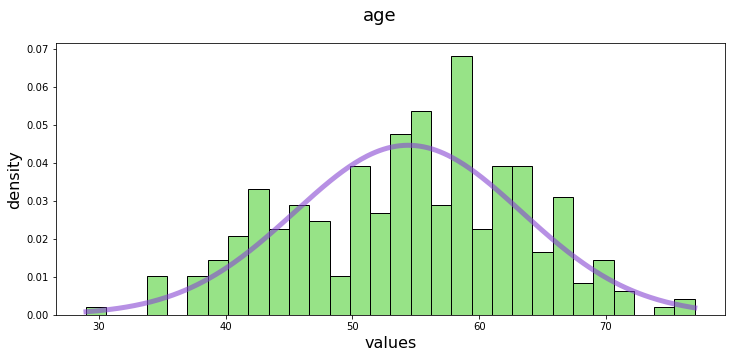

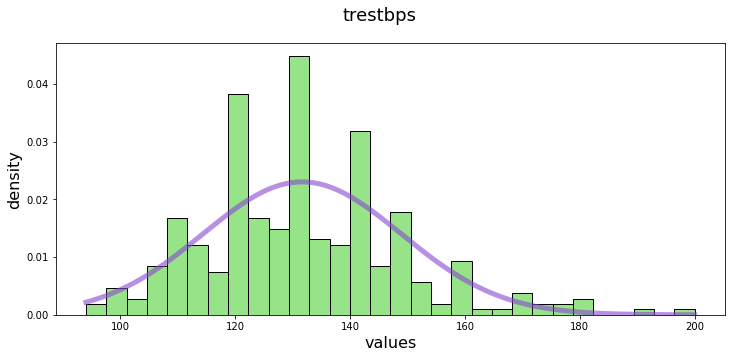

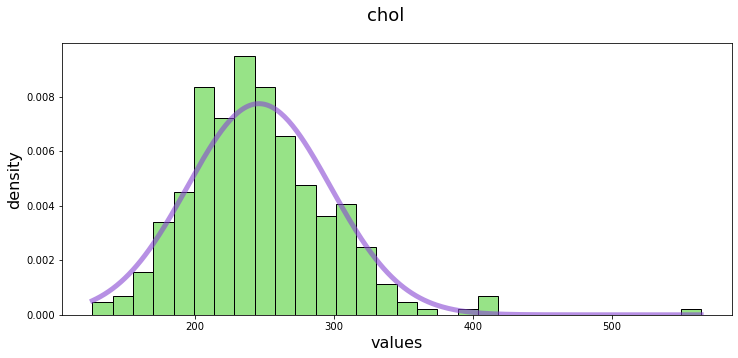

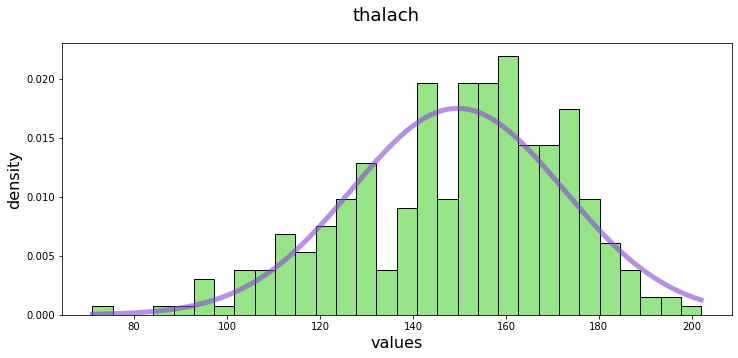

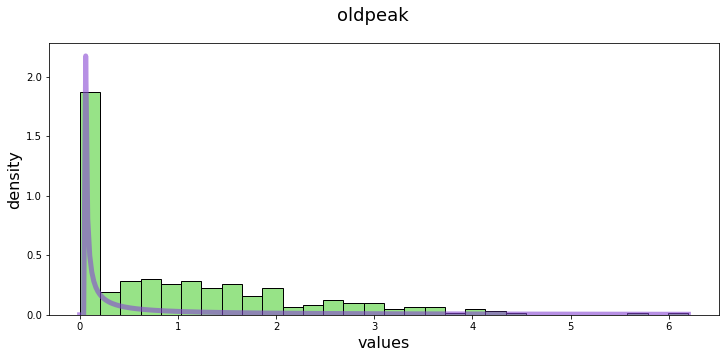

In [30]:
#only numerical columns per healthy and disease population
all_data_norm = df_heart[['age','trestbps', 'chol', 'thalach']] #normal dis
all_data_log = df_heart[['oldpeak']] #log dis
#change values equal to zero since lognorm dist cant have zero values (we change those values to be a little bit more than 0)
all_data_log_shift = all_data_log.replace([0],0.05).copy()

#normal features
for col in all_data_norm.columns:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
    fig.suptitle(col, fontsize=18)
    
    norm_mean, norm_std = scipy.stats.norm.fit(all_data_norm[col])
    
    sns.histplot(x=col, ax=ax, bins=30, data=all_data_norm, color="#74DA5F", stat='density')
    ax.set_xlabel('values', size=16)
    ax.set_ylabel('density', size=16)
    x_range = np.linspace(all_data_norm[col].min(), all_data_norm[col].max(), 302)
    ax.plot(x_range, scipy.stats.norm.pdf(x_range, norm_mean, norm_std),'#8747D2', lw=5, alpha=0.6)

#lognormal features
for col in all_data_log_shift.columns:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
    fig.suptitle(col, fontsize=18)
    
    shape, loc, scale = scipy.stats.lognorm.fit(all_data_log_shift[col])
    
    sns.histplot(x=col, ax=ax, bins=30, data=all_data_log, color="#74DA5F", stat='density')
    ax.set_xlabel('values', size=16)
    ax.set_ylabel('density', size=16)
    x = np.linspace(all_data_log[col].min(), all_data_log[col].max(), 302)
    ax.plot(x, scipy.stats.lognorm.pdf(x, shape, loc=loc, scale=scale),'#8747D2', lw=5, alpha=0.6) 

#### Question 3:
For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).


#### Answer 3:

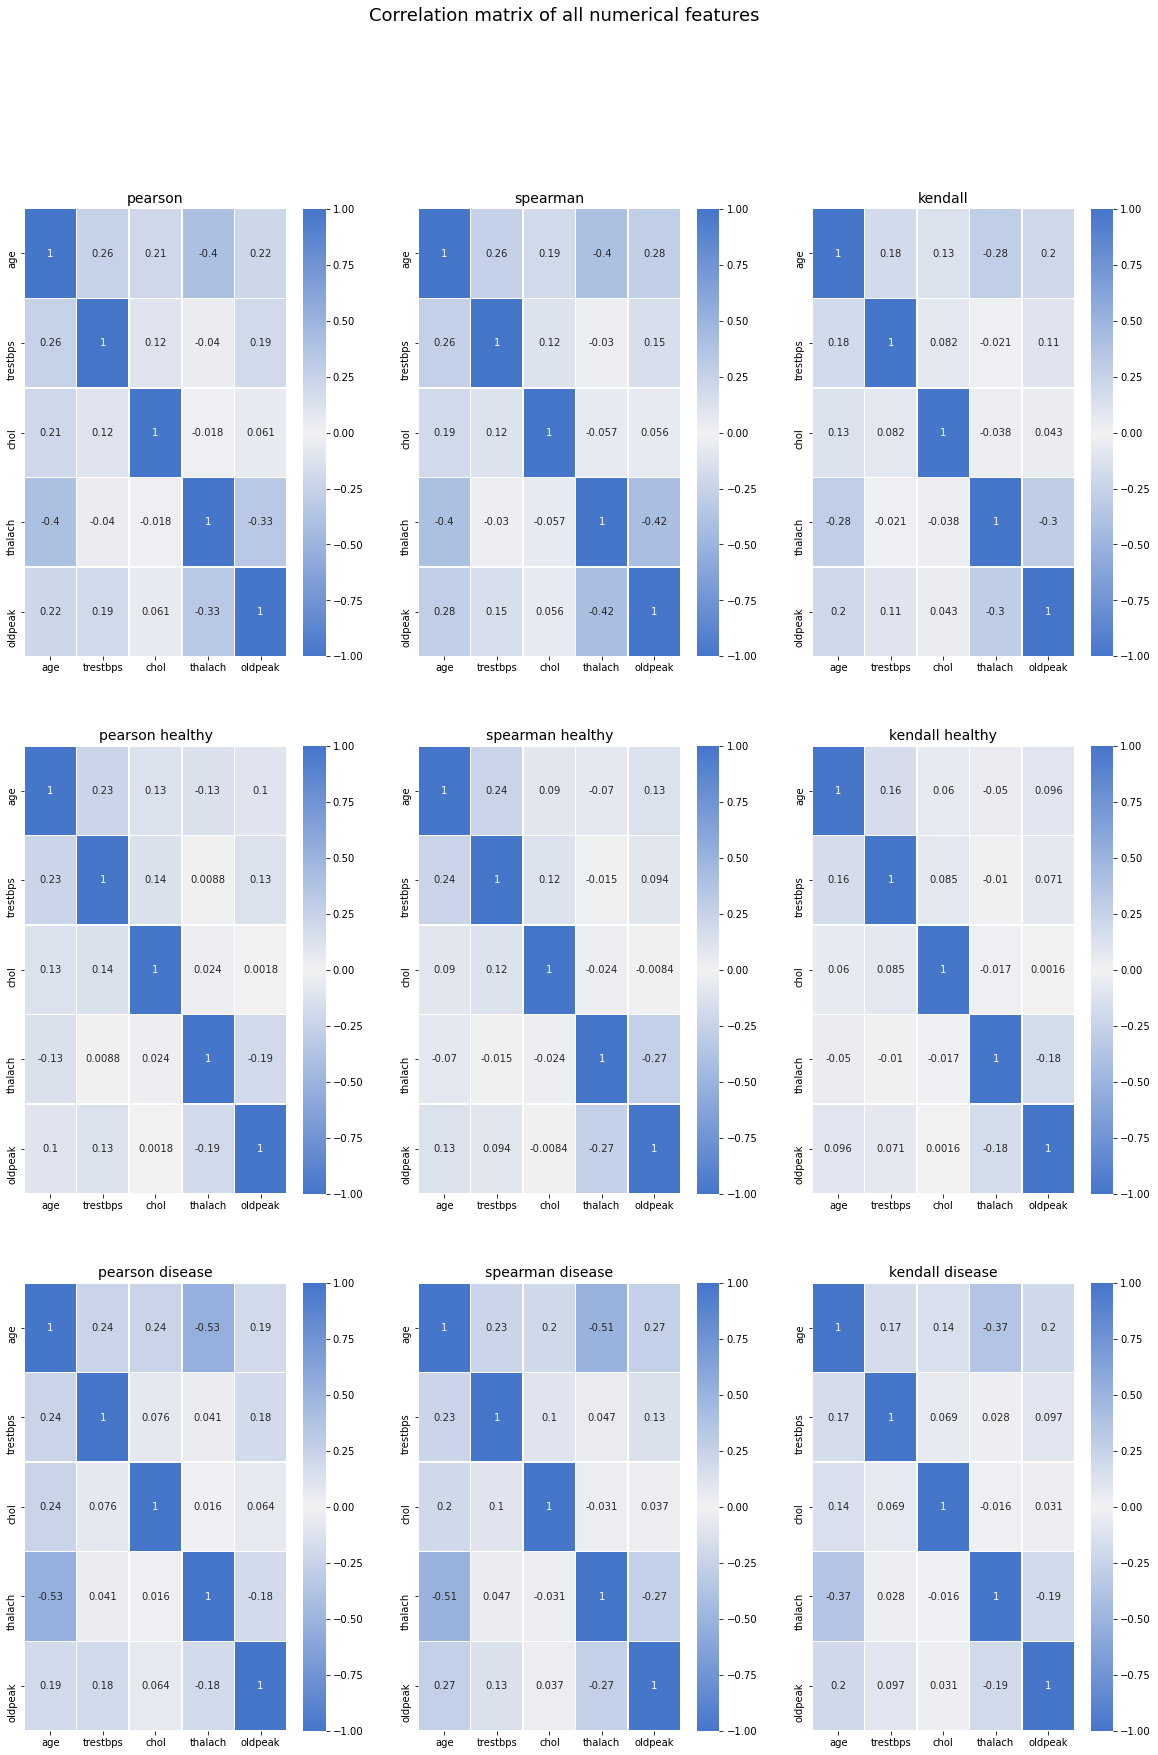

In [13]:
#draw heatmap corr for all 3 methods(pearson, spearman and kendall)
#check for correlations from all data and from only healthy/disease data
health_data_num = health_data[['age','trestbps', 'chol', 'thalach', 'oldpeak']]
disease_data_num = disease_data[['age','trestbps', 'chol', 'thalach', 'oldpeak']]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,28))
fig.suptitle('Correlation matrix of all numerical features', fontsize=18)

#all data
cmap = sns.diverging_palette(255,255, as_cmap=True)
sns.heatmap(df_heart_num.corr(method='pearson'), ax=ax[0][0], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[0][0].set_title('pearson', size=14)
sns.heatmap(df_heart_num.corr(method='spearman'), ax=ax[0][1], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[0][1].set_title('spearman', size=14)
sns.heatmap(df_heart_num.corr(method='kendall'), ax=ax[0][2], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[0][2].set_title('kendall', size=14)

#healthy data
sns.heatmap(health_data_num.corr(method='pearson'), ax=ax[1][0], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[1][0].set_title('pearson healthy', size=14)
sns.heatmap(health_data_num.corr(method='spearman'), ax=ax[1][1], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[1][1].set_title('spearman healthy', size=14)
sns.heatmap(health_data_num.corr(method='kendall'), ax=ax[1][2], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[1][2].set_title('kendall healthy', size=14)

#disease data
sns.heatmap(disease_data_num.corr(method='pearson'), ax=ax[2][0], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[2][0].set_title('pearson disease', size=14)
sns.heatmap(disease_data_num.corr(method='spearman'), ax=ax[2][1], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[2][1].set_title('spearman disease', size=14)
sns.heatmap(disease_data_num.corr(method='kendall'), ax=ax[2][2], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[2][2].set_title('kendall disease', size=14)

plt.show()

There is only one strong correlation (above 0.5 - the limit we chose) between all the numerical features.
'thalach'/'age' in disease data has pearson corr of -0.53. So we will check if that correlation is significant.

In [37]:
_, p_val_age_tha = scipy.stats.pearsonr(disease_data_num['thalach'], disease_data_num['age'])
print("the p-value of the corr of the features 'age' and 'thalach' is: {}".format(p_val_age_tha))

the p-value of the corr of the features 'age' and 'thalach' is: 3.3295645376688044e-13


From the p value we got we decided the correlation between 'age' to 'thalach' is significant. We will use those feature in our further calculations

Text(0.5, 1.08, 'Jointplot of Thalach/Age from disease data')

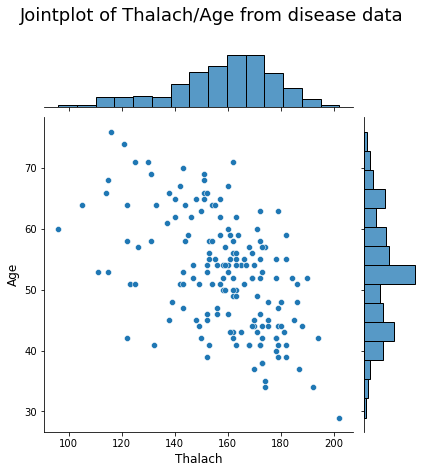

In [38]:
#jointplot
ax1 = sns.jointplot(data=disease_data_num, x='thalach', y='age', kind="scatter", marginal_kws=dict(bins=15))
ax1.set_axis_labels('Thalach', 'Age', fontsize=12)
ax1.fig.suptitle("Jointplot of Thalach/Age from disease data", y=1.08, fontsize=18)

<ipython-input-39-c51e18f38eb9>:12: UserWarning: No contour levels were found within the data range.
  ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),


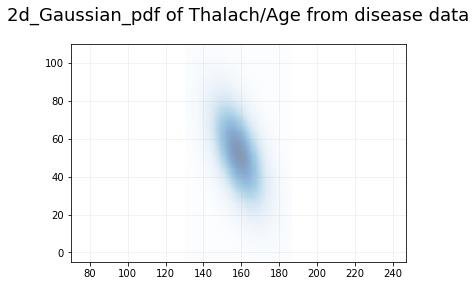

In [39]:
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    ax.set_title("2d_Gaussian_pdf of Thalach/Age from disease data", y=1.08, fontsize=18)
    plt.show()

#calc mean and cov of 'age' and 'thalach'    
thalach_mean = disease_data_num['thalach'].mean()
age_mean = disease_data_num['age'].mean()
means = [thalach_mean, age_mean]

thalach_age_data = disease_data_num[['age','thalach']]
df_cov = thalach_age_data.cov()
cov = df_cov.to_numpy()
    
plot_2d_Gaussian_pdf(means, cov)

#### Question 4:
Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?


#### Answer 4:

In the last question we already exmined significantly correlated features in the healthy data and the disease data. Now, we will try to find correlated features with gender distinction.

In [40]:
#male data only numerical features
male_data = df_heart[df_heart['sex'] == 1]
health_male_data = male_data[male_data['target'] == 0]
disease_male_data = male_data[male_data['target'] == 1]
male_data_num = male_data[['age','trestbps', 'chol', 'thalach', 'oldpeak']]
health_male_data_num = health_male_data[['age','trestbps', 'chol', 'thalach', 'oldpeak']]
disease_male_data_num = disease_male_data[['age','trestbps', 'chol', 'thalach', 'oldpeak']]

#female data only numerical features
female_data = df_heart[df_heart['sex'] == 0]
health_female_data = female_data[female_data['target'] == 0]
disease_female_data = female_data[female_data['target'] == 1]
female_data_num = female_data[['age','trestbps', 'chol', 'thalach', 'oldpeak']]
health_female_data_num = health_female_data[['age','trestbps', 'chol', 'thalach', 'oldpeak']]
disease_female_data_num = disease_female_data[['age','trestbps', 'chol', 'thalach', 'oldpeak']]

First, we will check for correlated feature in male data

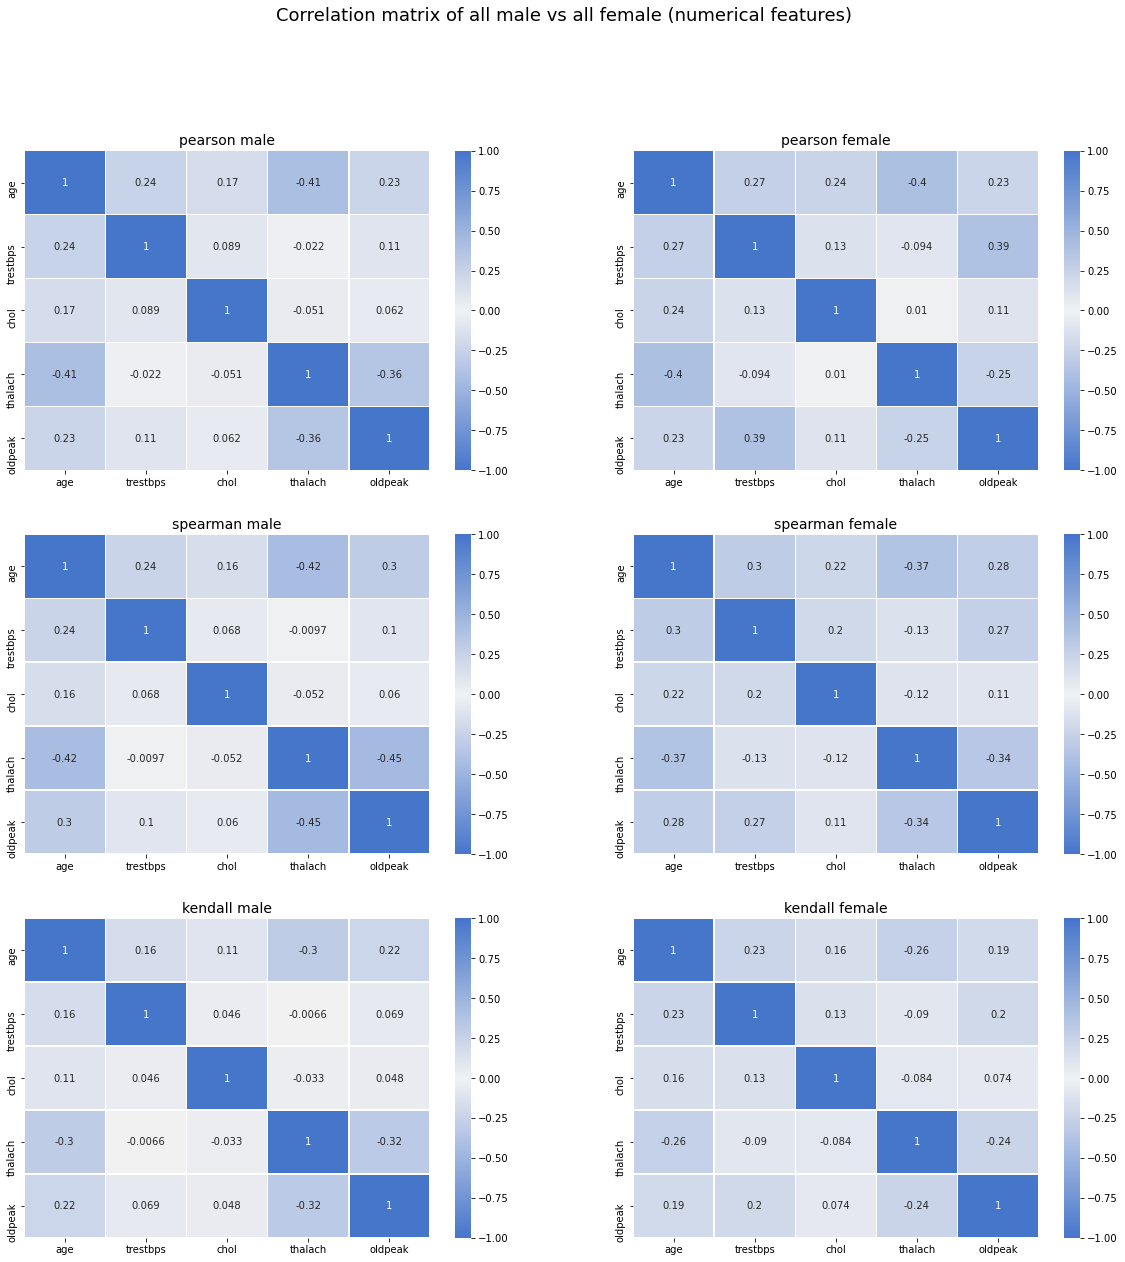

In [41]:
#draw heatmap corr for all 3 methods(pearson, spearman and kendall)
#check for correlations from all male and from all female data
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
fig.suptitle('Correlation matrix of all male vs all female (numerical features)', fontsize=18)
cmap = sns.diverging_palette(255,255, as_cmap=True)

#pearson
sns.heatmap(male_data_num.corr(method='pearson'), ax=ax[0][0], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[0][0].set_title('pearson male', size=14)
sns.heatmap(female_data_num.corr(method='pearson'), ax=ax[0][1], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[0][1].set_title('pearson female', size=14)

#spearman
sns.heatmap(male_data_num.corr(method='spearman'), ax=ax[1][0], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[1][0].set_title('spearman male', size=14)
sns.heatmap(female_data_num.corr(method='spearman'), ax=ax[1][1], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[1][1].set_title('spearman female', size=14)

#kendall
sns.heatmap(male_data_num.corr(method='kendall'), ax=ax[2][0], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[2][0].set_title('kendall male', size=14)
sns.heatmap(female_data_num.corr(method='kendall'), ax=ax[2][1], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[2][1].set_title('kendall female', size=14)

plt.show()

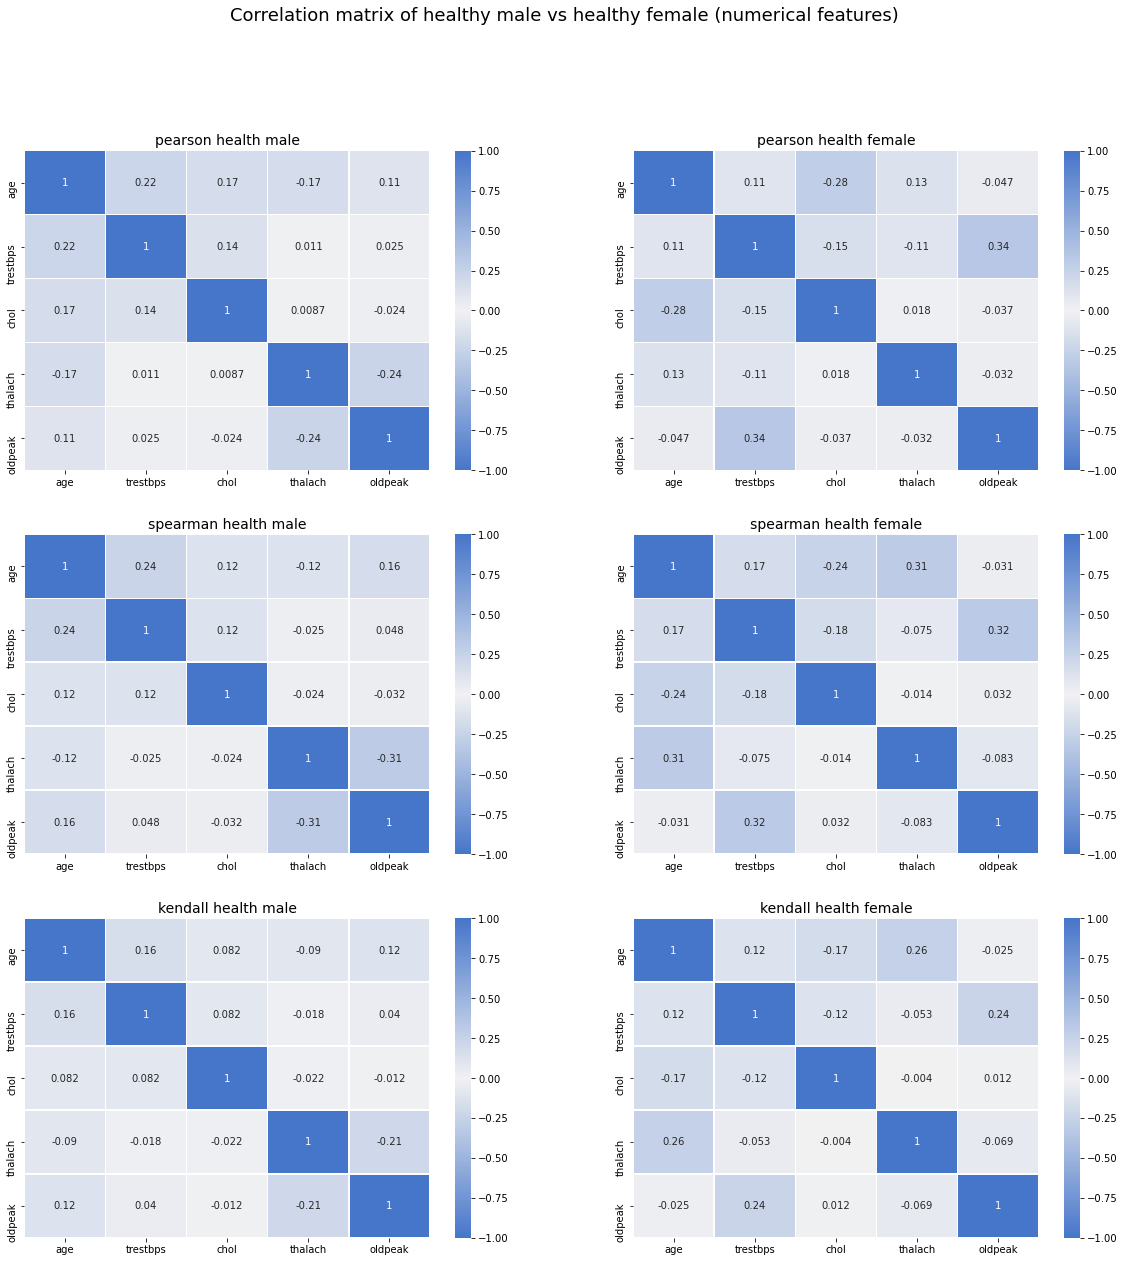

In [42]:
#draw heatmap corr for all 3 methods(pearson, spearman and kendall)
#check for correlations from healthy male and from healthy female data
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
fig.suptitle('Correlation matrix of healthy male vs healthy female (numerical features)', fontsize=18)
cmap = sns.diverging_palette(255,255, as_cmap=True)

#pearson
sns.heatmap(health_male_data_num.corr(method='pearson'), ax=ax[0][0], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[0][0].set_title('pearson health male', size=14)
sns.heatmap(health_female_data_num.corr(method='pearson'), ax=ax[0][1], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[0][1].set_title('pearson health female', size=14)

#spearman
sns.heatmap(health_male_data_num.corr(method='spearman'), ax=ax[1][0], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[1][0].set_title('spearman health male', size=14)
sns.heatmap(health_female_data_num.corr(method='spearman'), ax=ax[1][1], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[1][1].set_title('spearman health female', size=14)

#kendall
sns.heatmap(health_male_data_num.corr(method='kendall'), ax=ax[2][0], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[2][0].set_title('kendall health male', size=14)
sns.heatmap(health_female_data_num.corr(method='kendall'), ax=ax[2][1], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[2][1].set_title('kendall health female', size=14)

plt.show()

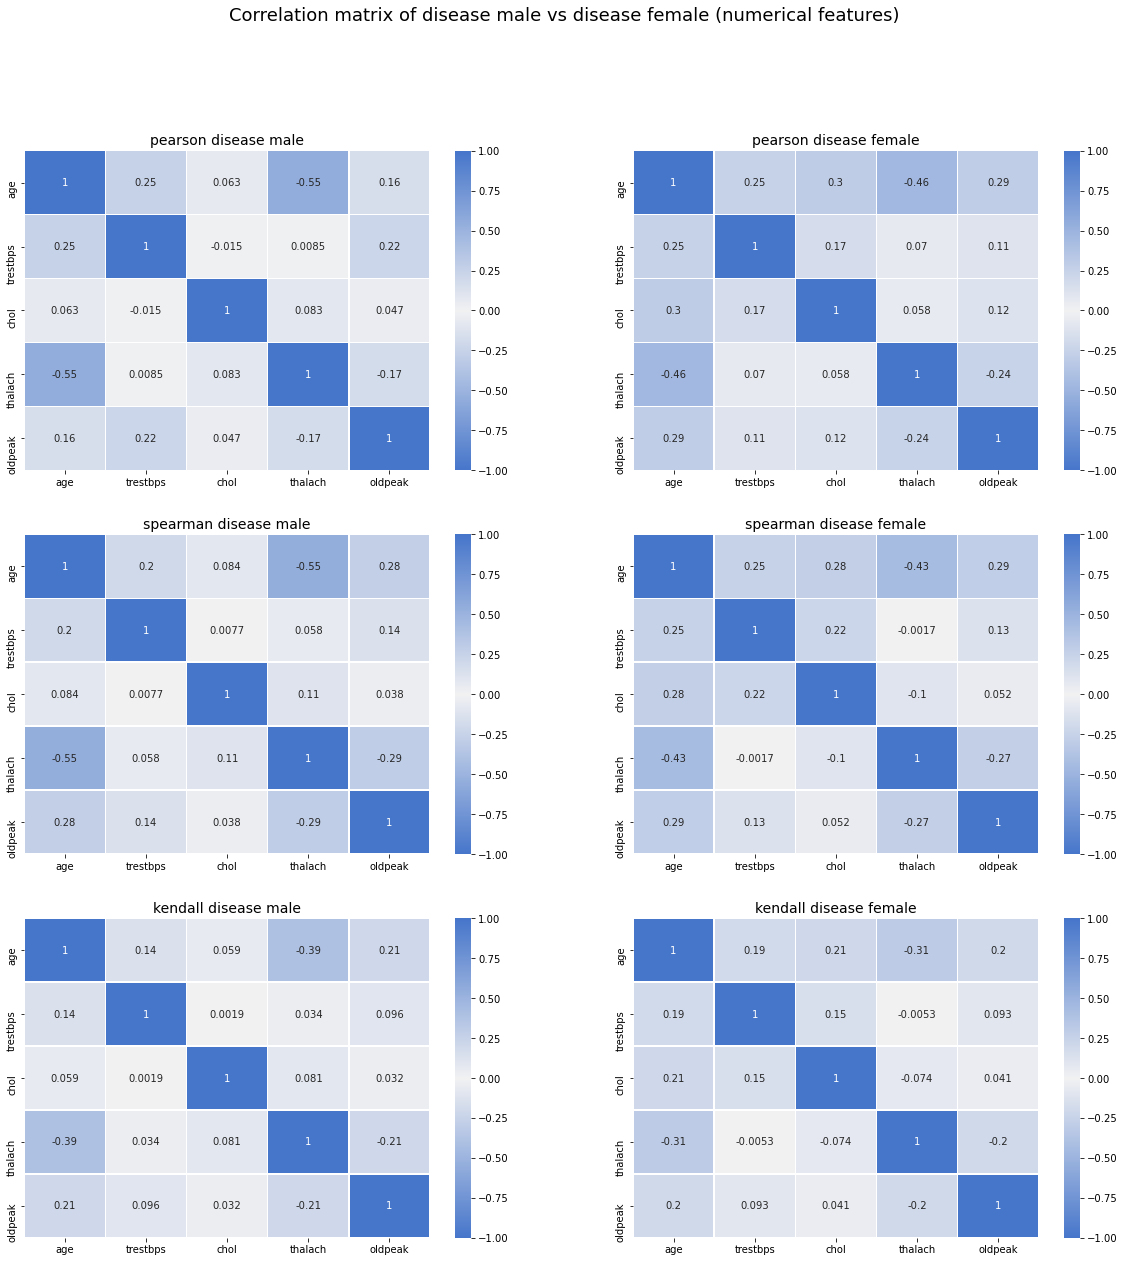

In [43]:
#draw heatmap corr for all 3 methods(pearson, spearman and kendall)
#check for correlations from disease male and from disease female data
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
fig.suptitle('Correlation matrix of disease male vs disease female (numerical features)', fontsize=18)
cmap = sns.diverging_palette(255,255, as_cmap=True)

#pearson
sns.heatmap(disease_male_data_num.corr(method='pearson'), ax=ax[0][0], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[0][0].set_title('pearson disease male', size=14)
sns.heatmap(disease_female_data_num.corr(method='pearson'), ax=ax[0][1], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[0][1].set_title('pearson disease female', size=14)

#spearman
sns.heatmap(disease_male_data_num.corr(method='spearman'), ax=ax[1][0], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[1][0].set_title('spearman disease male', size=14)
sns.heatmap(disease_female_data_num.corr(method='spearman'), ax=ax[1][1], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[1][1].set_title('spearman disease female', size=14)

#kendall
sns.heatmap(disease_male_data_num.corr(method='kendall'), ax=ax[2][0], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[2][0].set_title('kendall disease male', size=14)
sns.heatmap(disease_female_data_num.corr(method='kendall'), ax=ax[2][1], annot=True, center=0, cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
ax[2][1].set_title('kendall disease female', size=14)

plt.show()

#### conclusion:

From the heatmaps above we observe that there are no strong correlated in males but not in females or the opposite.
We found no major differences (above 0.5 - the limit we chose) even when we separated male and female into healthy and disease.
The biggest difference found between male and female is the correlation of 'oldpeak' and 'trestbps'. female get pearson corr of 0.39 while male get 0.11. When we observe the healthy male vs healthy female the gap is increase to 0.34 in female and 0.025 in male (but it may be related to the fact that the sample size of healthy female is small). 
We will check if those differences are significants

In [44]:
_, p_val_male_old_tres = scipy.stats.pearsonr(male_data_num['oldpeak'], male_data_num['trestbps'])
_, p_val_female_old_tres = scipy.stats.pearsonr(female_data_num['oldpeak'], female_data_num['trestbps'])
print("the p-value of the corr of the features 'oldpeak' and 'trestbps' for male is: {}".format(p_val_male_old_tres))
print("the p-value of the corr of the features 'oldpeak' and 'trestbps' for female is: {}".format(p_val_female_old_tres))

the p-value of the corr of the features 'oldpeak' and 'trestbps' for male is: 0.11819177735866322
the p-value of the corr of the features 'oldpeak' and 'trestbps' for female is: 9.572956503027135e-05


We found the correlations not significant since of high p-value. Even so, we will plot those correlations.

Text(0.5, 1.08, 'Correlation between oldpeak and trestbps in all female data')

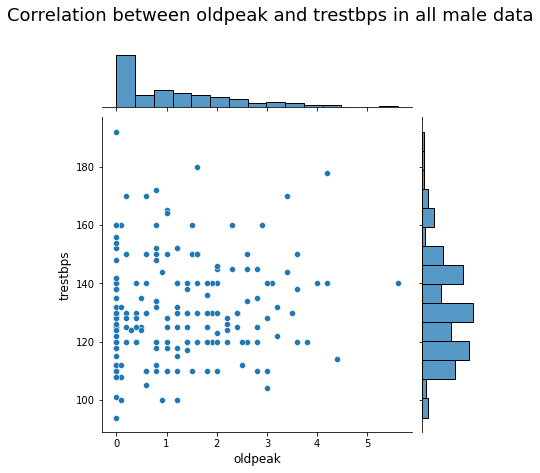

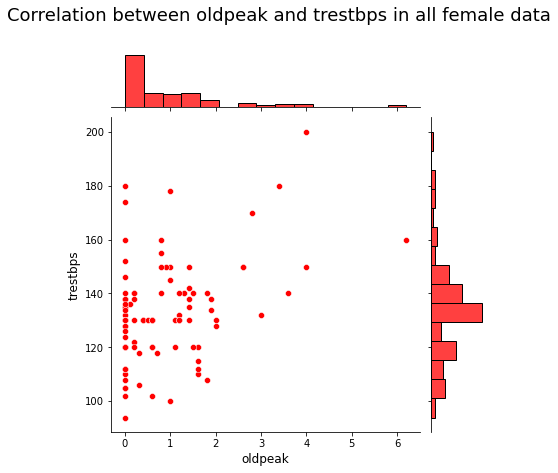

In [45]:
ax1 = sns.jointplot(data=male_data_num, x='oldpeak', y='trestbps', kind="scatter", marginal_kws=dict(bins=15))
ax1.set_axis_labels('oldpeak', 'trestbps', fontsize=12)
ax1.fig.suptitle("Correlation between oldpeak and trestbps in all male data", y=1.08, fontsize=18)

ax2 = sns.jointplot(data=female_data_num, x='oldpeak', y='trestbps', kind="scatter", marginal_kws=dict(bins=15), color='r')
ax2.set_axis_labels('oldpeak', 'trestbps', fontsize=12)
ax2.fig.suptitle("Correlation between oldpeak and trestbps in all female data", y=1.08, fontsize=18)

#### Question 5:
For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

#### Answer 5:

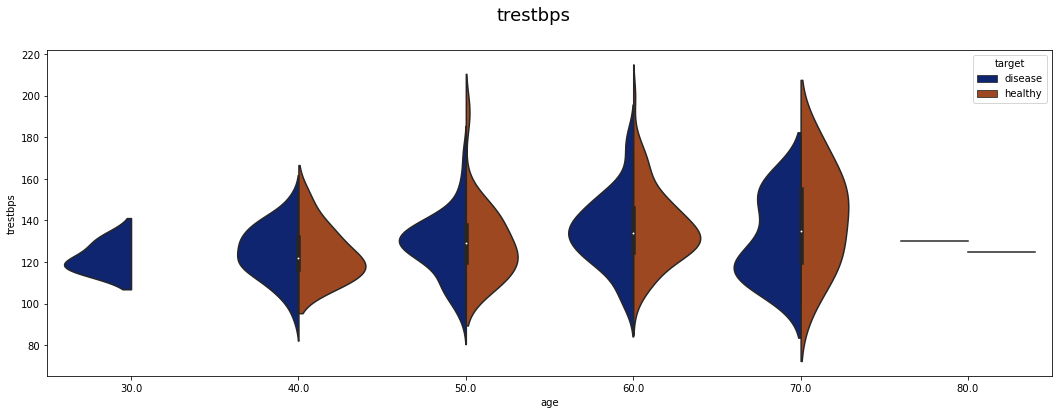

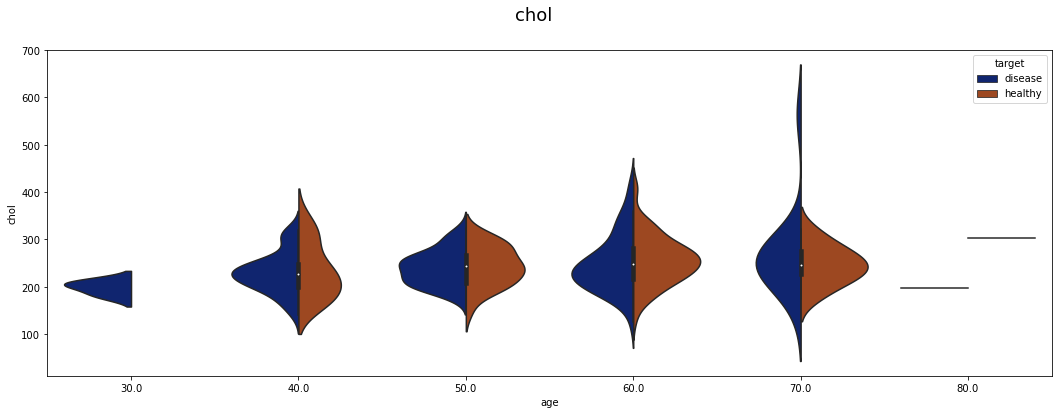

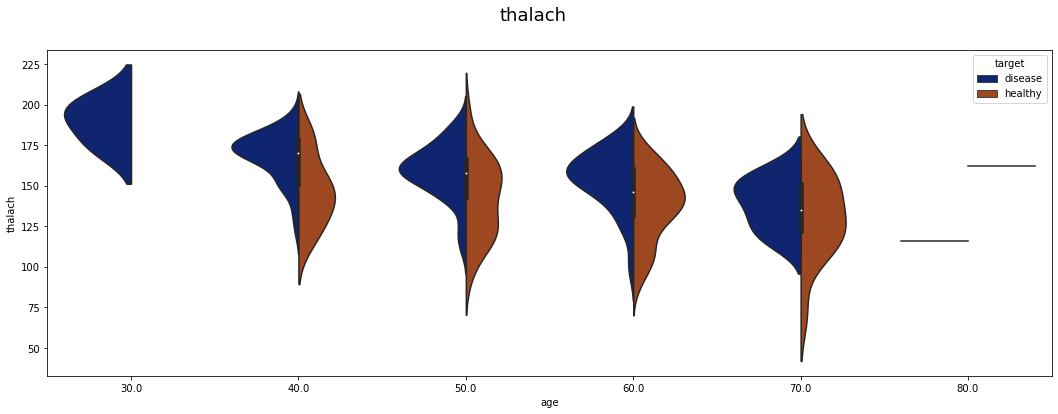

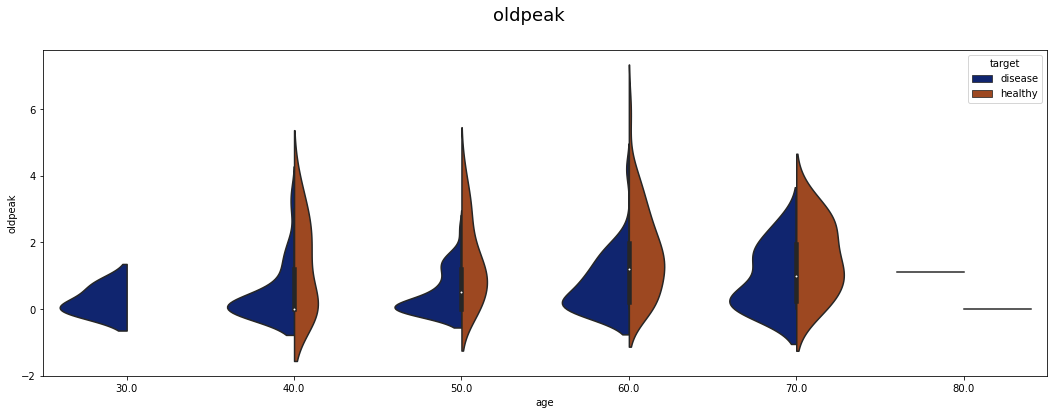

In [46]:
df_heart_num_target = df_heart[['trestbps', 'chol', 'thalach', 'oldpeak','target']].copy()
df_heart_num_except_age = df_heart[['trestbps', 'chol', 'thalach', 'oldpeak']].copy()

#change values of target feature for more understandable legend
df_heart_num_target['target'] = df_heart_num_target['target'].replace([0],'healthy').copy()
df_heart_num_target['target'] = df_heart_num_target['target'].replace([1],'disease').copy()

#round all age values to 10,20,30...
df_only_age_bins = df_heart_num['age'].copy()
age_size = df_only_age_bins.count() 
for i in range(age_size):
       df_only_age_bins[i] = (round(df_only_age_bins[i]/10))*10                    

#plot violin for each feature
for col in df_heart_num_except_age.columns:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,6))
    fig.suptitle(col, fontsize=18)   
    sns.violinplot(x=df_only_age_bins, y=col, hue='target', data=df_heart_num_target, palette='dark',split=True)
  

#### Question 6 (original question):
By the given data, check if serum cholestoral is higher in disease female than in disase male (in the population). 
More specifically, the null hypotheses assumes serum cholestoral is higher or equal in disease male.
All the given data is independent. In your answer, provide histogram of the two samples.

#### Answer 6:
Our alternative hypothesis (H1): CHOL_disease_female > CHOL_disease_male.

Since the means of the two samples follow normal distributions and both are independent, we will use welch's t-test (their variances are not similar)

First, we will take a look at both samples hisograms

<ipython-input-49-cb156a902f07>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease_female_data['chol'] = np.where(fe_arr > 450, median, fe_arr).tolist()


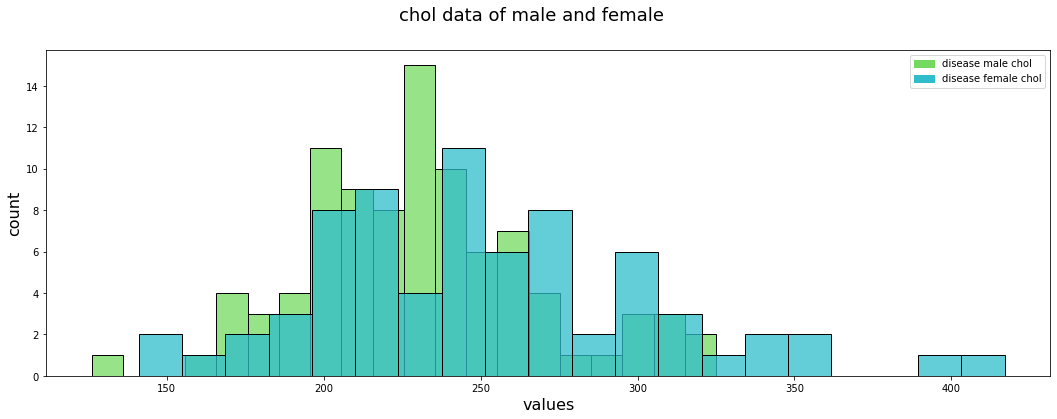

In [49]:
import matplotlib.patches as mpatches

#fix outliers in female data
fe_arr = np.array(disease_female_data['chol'].values.tolist())
median = np.median(disease_female_data['chol'])
disease_female_data['chol'] = np.where(fe_arr > 450, median, fe_arr).tolist()

#plot histograms
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,6))
fig.suptitle('chol data of male and female', fontsize=18)
sns.histplot(x='chol', ax=ax, bins=20, data=disease_male_data, color="#74DA5F", legend=True)
sns.histplot(x='chol', ax=ax, bins=20, data=disease_female_data, color="#2FBDCC", legend=True)
ax.set_xlabel('values', size=16)
ax.set_ylabel('count', size=16)
male_leg = mpatches.Patch(color='#74DA5F', label='disease male chol')
female_leg = mpatches.Patch(color='#2FBDCC', label='disease female chol')
plt.legend(handles=[male_leg, female_leg])


In [23]:
#now, we will calculate the p-val by Welch’s t-test since the variances are not equal
t_stat, p_val = scipy.stats.ttest_ind(disease_male_data['chol'], disease_female_data['chol'], equal_var=False)
p_val = round(p_val/2, 4)
print("p-value is:")
print(p_val)

p-value is:
0.0037


#### conclusion:
We got p-value of 0.0037. we decided to reject the null hypotheses. serum cholestoral is not higher(or equal) in disease male than in disase female

### Question 3 - Heavy Tailed distributions (10 points)

Recall the definition of Heavy Tailed distribtion from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

#### 3.A
Does the standard normal distribution have a heavy right tail? prove your answer.

### Answer:

The standard normal distribution does not have a heavy right tail.\
We will prove that:
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)\neq \infty $$


$$\begin{equation}
\begin{split}
\forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)&=
\lim_{x\to\infty} e^{tx} \cdot (1-CDF) \\
&=\lim_{x\to\infty} \frac{(1-CDF)}{{1\over e^{tx}}} / (1-CDF)=0, {1\over e^{tx}}=0 \Rightarrow L'Hôpital\\
&=\lim_{x\to\infty} \frac{(1-CDF)'}{({1\over e^{tx}})'} / CDF' = PDF\\
&=\lim_{x\to\infty} \frac{-PDF}{-t \cdot e^{-tx}}\\
&=\lim_{x\to\infty} \frac{e^{{-x^2\over2}}}{\sqrt{2\pi}}\cdot \frac{e^{tx}}{t}\\
&=\lim_{x\to\infty} \frac{e^{tx-{x^2\over2}}}{t\cdot\sqrt{2\pi}}=0\neq\infty
\end{split}
\end{equation}$$

#### 3.B
Does the standard log-normal distribution have a heavy right tail? prove your answer.

### Answer:

The standard log-normal distribution does have a heavy right tail.\
We will prove that:
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x) = \infty $$


$$\begin{equation}
\begin{split}
\forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)&=
\lim_{x\to\infty} e^{tx} \cdot (1-CDF) \\
&=\lim_{x\to\infty} \frac{(1-CDF)}{{1\over e^{tx}}} / (1-CDF)=0, {1\over e^{tx}}=0 \Rightarrow L'Hôpital\\
&=\lim_{x\to\infty} \frac{(1-CDF)'}{({1\over e^{tx}})'} / CDF' = PDF\\
&=\lim_{x\to\infty} \frac{-PDF}{-t \cdot e^{-tx}}\\
&=\lim_{x\to\infty} \frac{e^{{-(\ln x)^2\over2}}}{x\cdot \sqrt{2\pi}}\cdot \frac{e^{tx}}{t}\\
&=\lim_{x\to\infty} \frac{1}{t\sqrt{2\pi}}\cdot \frac{e^{tx-{-(\ln x)^2\over2}}}{e^{\ln x}}\\
&=\lim_{x\to\infty} \frac{1}{t\sqrt{2\pi}}\cdot e^{tx-{-(\ln x)^2\over2}-\ln x} = \infty
\end{split}
\end{equation}$$

### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, $X_0$, is $U(1...6)$, i.e. $P(X_0=i)=\pi_0(i)=1/6, \forall i\in{\{1,..,6\}}$<br>
After i rolls are determined the $i+1^{st}, X_{i+1},$ is drawn according to the row that corresponds to the value of $X_i$ in the matrix $T$ below. <br>
In other words, $T$ is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

### Answer:

1. The transition matrix is stationary, which means that each possibillity has the same probabillity at average (the sum of each column is 1).
Therefore - I expect the average value of the different trajectories to be close to 3.5, which is the mean of U(1..6).

The empirical mean of the average value of each trajectory is 3.494766666666667
The empirical std of the average value of each trajectory is 0.4710606837529298


Text(0.5, 1.0, 'Average values of trajectories')

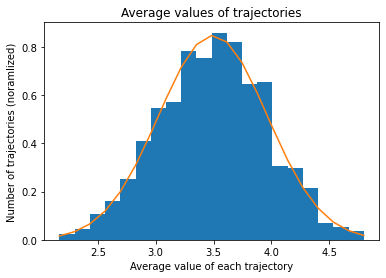

In [58]:
def trajectory (len_of_traj,matrix):
    ans=np.zeros(len_of_traj,dtype=int)
    dice=np.array(range(1,7))
    ans[0]=int(np.random.choice(dice))
    for i in range(1,len_of_traj):
        ans[i]=int(np.random.choice(dice,size=1,p=matrix[ans[i-1]-1]))
    return np.mean(ans)

transition_matrix=np.array([[0.4,0.2,0.1,0,0.1,0.2],
                  [0.2,0.4,0.2,0.1,0,0.1],
                  [0.1,0.2,0.4,0.2,0.1,0],
                  [0,0.1,0.2,0.4,0.2,0.1],
                  [0.1,0,0.1,0.2,0.4,0.2],
                  [0.2,0.1,0,0.1,0.2,0.4]])

list_of_trajectories=np.zeros(1000)
for j in range(1000):
    list_of_trajectories[j]=trajectory(30,transition_matrix)
mean=np.mean(list_of_trajectories)
std=np.std(list_of_trajectories)
print(f"The empirical mean of the average value of each trajectory is {mean}")
print(f"The empirical std of the average value of each trajectory is {std}")

_,bins,_=plt.hist(list_of_trajectories,bins=20,density=1)
line=stats.norm.pdf(bins,mean,std)
plt.plot(bins,line)
plt.xlabel('Average value of each trajectory')
plt.ylabel('Number of trajectories (noramlized)')
plt.title('Average values of trajectories')

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

### Answer:

I expect the average value of all 500 numbers in a trajectory to be even closer to 3.5 then the one calculated in section 4.A.

The empirical mean of the average value of each trajectory is 3.49676
The empirical std of the average value of each trajectory is 0.1191224177054848


Text(0.5, 1.0, 'Average values of trajectories')

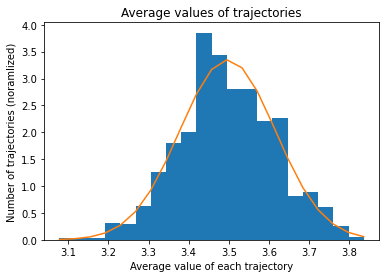

In [60]:
list_of_trajectories2=np.zeros(1000)
for j in range(1000):
    list_of_trajectories2[j]=trajectory(500,transition_matrix)
mean2=np.mean(list_of_trajectories2)
std2=np.std(list_of_trajectories2)
print(f"The empirical mean of the average value of each trajectory is {mean2}")
print(f"The empirical std of the average value of each trajectory is {std2}")

_,bins,_=plt.hist(list_of_trajectories2,bins=20,density=1)
line2=stats.norm.pdf(bins,mean2,std2)
plt.plot(bins,line2)
plt.xlabel('Average value of each trajectory')
plt.ylabel('Number of trajectories (noramlized)')
plt.title('Average values of trajectories')

#### 4.C
Draw normal fit curves on your two histograms.

Answered in sections A and B

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

In [55]:
def cov0i(pi,T):
    cov_arr=np.zeros(500)
    pi[0]=np.array(pi[0])
    E_X=np.average(pi[0],weights=pi[1]) #E(X)=E(X0)
    XY_values=np.concatenate((pi[0],2*pi[0],3*pi[0],4*pi[0],5*pi[0],6*pi[0]))
    for i in range(1,500):
        pi_i=np.linalg.matrix_power(T,i)
        XY_prob=np.concatenate((pi_i[0],pi_i[1],pi_i[2],pi_i[3],pi_i[4],pi_i[5]))
        E_XY=np.average(XY_values,weights=XY_prob)
        cov_arr[i]=E_XY-E_X*E_X #E(Y)=E(Xn)=E(X0)
    return cov_arr


transition_matrix=np.array([[0.4,0.2,0.1,0,0.1,0.2],
                  [0.2,0.4,0.2,0.1,0,0.1],
                  [0.1,0.2,0.4,0.2,0.1,0],
                  [0,0.1,0.2,0.4,0.2,0.1],
                  [0.1,0,0.1,0.2,0.4,0.2],
                  [0.2,0.1,0,0.1,0.2,0.4]])
pi=[[1,2,3,4,5,6],[1/6,1/6,1/6,1/6,1/6,1/6]]

cov_arr = cov0i(pi,transition_matrix)
print(cov_arr)

[ 0.00000000e+00  1.11666667e+00  5.16666667e-01  2.52666667e-01
  1.25466667e-01  6.25866667e-02  3.12666667e-02  1.56282667e-02
  7.81314667e-03  3.90637867e-03  1.95315067e-03  9.76567627e-04
  4.88282275e-04  2.44140830e-04  1.22070353e-04  6.10351644e-05
  3.05175798e-05  1.52587894e-05  7.62939459e-06  3.81469728e-06
  1.90734863e-06  9.53674316e-07  4.76837156e-07  2.38418577e-07
  1.19209288e-07  5.96046412e-08  2.98023188e-08  1.49011576e-08
  7.45058060e-09  3.72529030e-09  1.86264160e-09  9.31319022e-10
  4.65659511e-10  2.32828867e-10  1.16408216e-10  5.82041082e-11
  2.91002777e-11  1.45483625e-11  7.27062854e-12  3.63264974e-12
  1.81366033e-12  9.04165631e-13  4.49418280e-13  2.22044605e-13
  1.11910481e-13  5.15143483e-14  2.48689958e-14  1.06581410e-14
  5.32907052e-15 -1.77635684e-15  1.77635684e-15 -5.32907052e-15
  1.77635684e-15  1.77635684e-15 -3.55271368e-15 -7.10542736e-15
 -5.32907052e-15 -5.32907052e-15 -5.32907052e-15 -5.32907052e-15
 -5.32907052e-15 -5.32907

#### 4.E - Bonus
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that 
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

#### Answer (1):
We know that:
$X_0$, is $U(1...6)$, i.e. $P(X_0=i)=\pi_0(i)=1/6, \forall i\in{\{1,..,6\}}$ 

Since T is a stationary matrix, we know that: $\pi_1 =\pi_0 \cdot T= \pi_0$

If so, $\forall n, \pi_n(i)=1/6, \forall i\in{\{1,..,6\}}$

So, $\pi_n=\pi_0$

Hence: $E(X_0)=X\cdot \pi_0=X\cdot \pi_n=E(\bar{X_n})$

In our case, $E(X_0)=E(\bar{X_n})=3.5$

#### Answer (2):

In [83]:
#Answer (2):
#Calculation of V(X_n) for our case:
cov=0
for i in range (1,500):
    cov+=(500-i)*cov_arr[i]
var_markov=(1/(500))*(25/12) + (2/(500**2))*cov 
print (f'Var(X_n)={var_markov}')
std_markov = math.sqrt(var)

Var(X_n)=0.012679679526745853


#### Answer (4):

In the histogram below, we can see that the distribution $\bar{X_n}$ (the sample average for a single trajectory of length of 500) is aproximately similliar to $X_0$, which is U(1...6). 

That proves that the CLT holds for n=500 in our case.

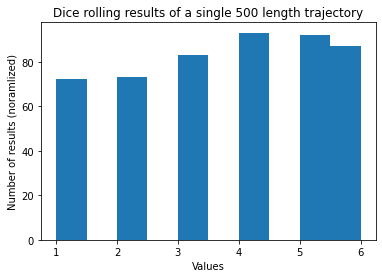

In [56]:
transition_matrix=np.array([[0.4,0.2,0.1,0,0.1,0.2],
                  [0.2,0.4,0.2,0.1,0,0.1],
                  [0.1,0.2,0.4,0.2,0.1,0],
                  [0,0.1,0.2,0.4,0.2,0.1],
                  [0.1,0,0.1,0.2,0.4,0.2],
                  [0.2,0.1,0,0.1,0.2,0.4]])
pi=[[1,2,3,4,5,6],[1/6,1/6,1/6,1/6,1/6,1/6]]

cov_arr=cov0i(pi,transition_matrix)


def trajectory_show (len_of_traj,matrix):
    ans=np.zeros(len_of_traj,dtype=int)
    dice=np.array(range(1,7))
    ans[0]=int(np.random.choice(dice))
    for i in range(1,len_of_traj):
        ans[i]=int(np.random.choice(dice,size=1,p=matrix[ans[i-1]-1]))
    return ans

plt.hist(trajectory_show(500,transition_matrix))
plt.xlabel('Values')
plt.ylabel('Number of results (noramlized)')
plt.title('Dice rolling results of a single 500 length trajectory')
plt.show()

#### Answer (4):

In the histogram below, we can see that the distribution $\bar{X_n}$ (the sample average for a single trajectory of length of 500) is aproximately fits to the pdf of the mean and the std that we calculated from the formulas on section 4E1 and 4E2.
That proves that the CLT holds for n=500 in our case.

Text(0.5, 1.0, 'Average values of trajectories')

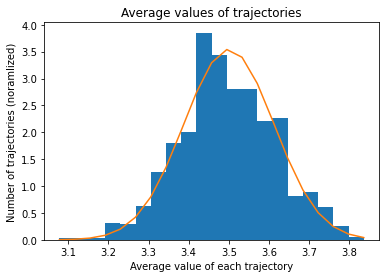

In [84]:
_,bins,_=plt.hist(list_of_trajectories2,bins=20,density=1)
line2=stats.norm.pdf(bins,3.5,std_markov)
plt.plot(bins,line2)
plt.xlabel('Average value of each trajectory (length 500)')
plt.ylabel('Number of trajectories (noramlized)')
plt.title('Average values of trajectories')

### Question 5 - Sampling of Kendall correlation (15 points)

Recall that the Naive time complexity of computing Kendall correlation is $O(n^2)$. We will investigate a sampling approach to approximate Kendall correlations efficiently. 

#### 5.A
Draw a sample of 10M samples from a bivariate distribution $(X,Y)\sim \mathcal{N}(\bf{0},S)$ with the covariance matrix $S=\begin{pmatrix} 2 & 3\\ 3 & 5 \end{pmatrix}$. <br>
Calculate the Kendall correlation $\tau(X,Y)$.
How long did this calculation take?

C:\Users\omer2\anaconda3\lib\site-packages\scipy\stats\stats.py:4442: UserWarning: "initial_lexsort" is gone!
  warnings.warn('"initial_lexsort" is gone!')


Kendall correlation of (X,Y) is 0.7952278759324677
Calculation time is: 4.2205747999978485 seconds


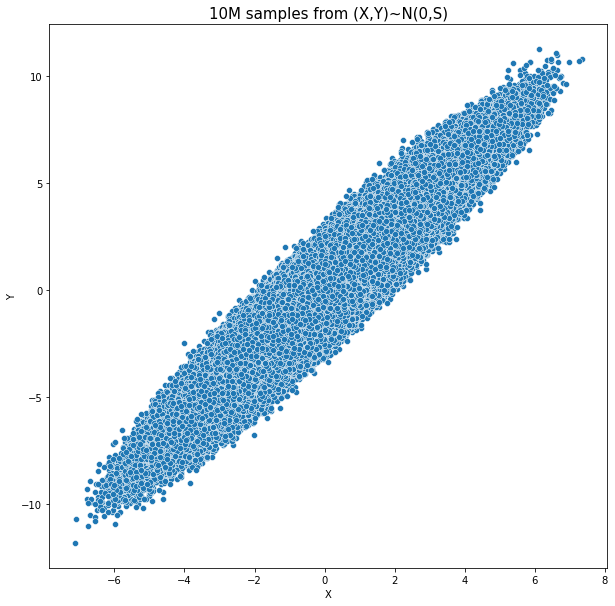

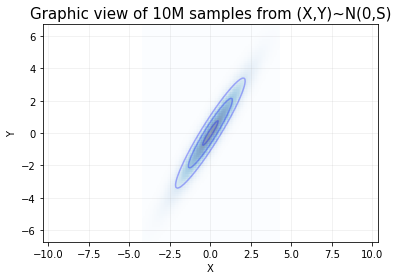

In [46]:
sample=np.random.multivariate_normal([0,0],[[2,3],[3,5]],10000000)
sample=np.transpose(sample)

plt.figure(figsize=(10,10))
sns.scatterplot(x=sample[0],y=sample[1])
plt.title(r'10M samples from (X,Y)~N(0,S)', fontsize=15)
plt.xlabel('X')
plt.ylabel('Y')

start_timer=timeit.default_timer()
kendall=stats.kendalltau(sample[0],sample[1], initial_lexsort=False) #initial_lexsort=False - adjusting the function to time complexity of o(n^2)
print(f"Kendall correlation of (X,Y) is {kendall[0]}")
stop_timer=timeit.default_timer()
print(f"Calculation time is: {stop_timer-start_timer} seconds")

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.title(r'Graphic view of 10M samples from (X,Y)~N(0,S)', fontsize=15)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    
plot_2d_Gaussian_pdf([0,0],[[2,3],[3,5]])

#### 5.B
Sample 1,000 points from the data and calculate the Kendall correlation $\tau(U,V)$. 

In [28]:
def kendall_cor_sample(data,num_of_samples):
    random_list=random.sample(range(10000000),num_of_samples)
    sample2=np.zeros((2,num_of_samples))
    for i in range (num_of_samples):
        sample2[0][i]=data[0][random_list[i]]
        sample2[1][i]=data[1][random_list[i]]
    kendall2=stats.kendalltau(sample2[0],sample2[1])
    return kendall2[0]

print(f"Kendall correlation of 1000 samples of (X,Y) is {kendall_cor_sample(sample,1000)}")

Kendall correlation of 1000 samples of (X,Y) is 0.7914194194194195


#### 5.C
Repeat Section 5.B 1000 times and plot a histogram of the calculated $\tau(U,V)$ values. Indicate the true $\tau(X,Y)$ (calculated on the entire 10M samples) on the histogram. What are the empirical mean and stadard deviation of the calculated $\tau(U,V)$ values?

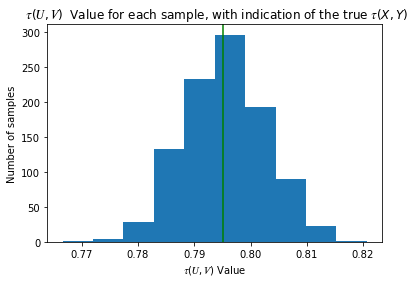

The empirical mean of the calculated 𝜏(𝑈,𝑉) values, out of 1000 samples is - 0.7954110470470471
The empirical standard deviation of the calculated 𝜏(𝑈,𝑉) values, out of 1000 samples is - 0.007225393487644499


[0.007225393487644499, 2.026620200000025]

In [29]:
def calc_kendall_samples (data, num_of_samples):
    start_timer=timeit.default_timer()
    list_kendall_samples=[]
    for i in range(1000):
        list_kendall_samples.append(kendall_cor_sample(data,num_of_samples))
    stop_timer=timeit.default_timer()
    time_comp=stop_timer-start_timer
    mean=np.mean(list_kendall_samples)
    std=np.std(list_kendall_samples)

    print(f"The empirical mean of the calculated 𝜏(𝑈,𝑉) values, out of {num_of_samples} samples is - {mean}")
    print(f"The empirical standard deviation of the calculated 𝜏(𝑈,𝑉) values, out of {num_of_samples} samples is - {std}")
    return [std,time_comp]

calc_kendall_samples (sample, 1000)

#### 5.D
Repeat Section 5.C for samples of $m={10, 50, 100, 500, 1000, 5000}$ points. <br>
What is the naive time complexity of each calculation? <br>
Compare the empirical time complexity and the standard deviation of the calucated values to the size of the sample.

### Answer:

Assume that the function stats.kendalltau ~ $O(n^2)$, as writen.\
The naive time complexity of each calculation is $$O(1000\cdot (m^2+m) = O(m^2)$$

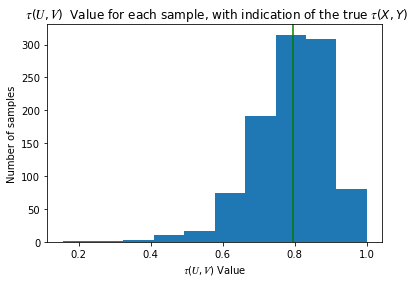

The empirical mean of the calculated 𝜏(𝑈,𝑉) values, out of 10 samples is - 0.8015999999999999
The empirical standard deviation of the calculated 𝜏(𝑈,𝑉) values, out of 10 samples is - 0.10916250430289243


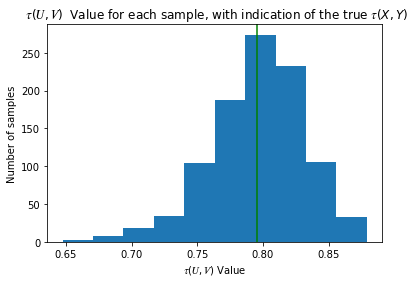

The empirical mean of the calculated 𝜏(𝑈,𝑉) values, out of 50 samples is - 0.7958236734693878
The empirical standard deviation of the calculated 𝜏(𝑈,𝑉) values, out of 50 samples is - 0.03545491867112155


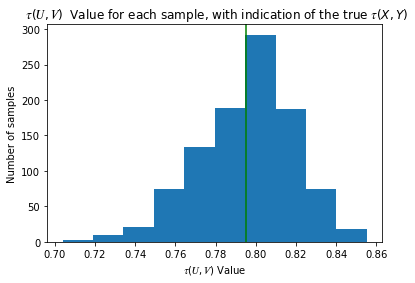

The empirical mean of the calculated 𝜏(𝑈,𝑉) values, out of 100 samples is - 0.7956626262626264
The empirical standard deviation of the calculated 𝜏(𝑈,𝑉) values, out of 100 samples is - 0.02380584931023239


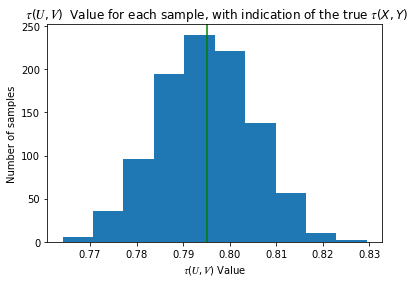

The empirical mean of the calculated 𝜏(𝑈,𝑉) values, out of 500 samples is - 0.7949203527054106
The empirical standard deviation of the calculated 𝜏(𝑈,𝑉) values, out of 500 samples is - 0.010024207913648988


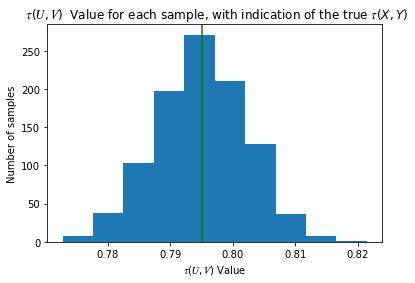

The empirical mean of the calculated 𝜏(𝑈,𝑉) values, out of 1000 samples is - 0.7950067507507508
The empirical standard deviation of the calculated 𝜏(𝑈,𝑉) values, out of 1000 samples is - 0.007156505530894254


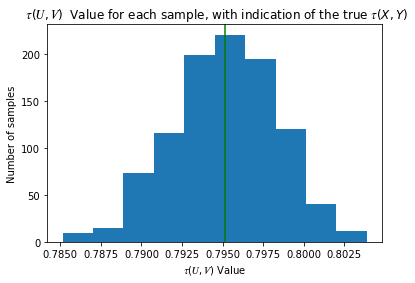

The empirical mean of the calculated 𝜏(𝑈,𝑉) values, out of 5000 samples is - 0.7951702103620725
The empirical standard deviation of the calculated 𝜏(𝑈,𝑉) values, out of 5000 samples is - 0.0032147157185083257


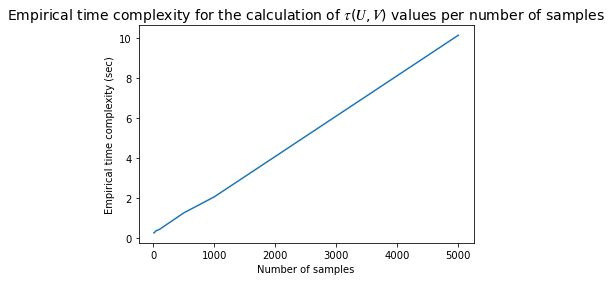

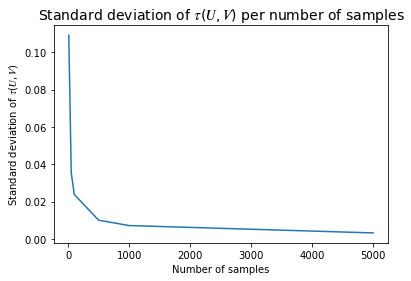

In [30]:
answer_10=calc_kendall_samples (sample, 10)
answer_50=calc_kendall_samples (sample, 50)
answer_100=calc_kendall_samples (sample, 100)
answer_500=calc_kendall_samples (sample, 500)
answer_1000=calc_kendall_samples (sample, 1000)
answer_5000=calc_kendall_samples (sample, 5000)

num_of_samples=[10,50,100,500,1000,5000]
std_arr=[answer_10[0],answer_50[0],answer_100[0],answer_500[0],answer_1000[0],answer_5000[0]]
time_comp_arr=[answer_10[1],answer_50[1],answer_100[1],answer_500[1],answer_1000[1],answer_5000[1]]

plt.plot(num_of_samples, time_comp_arr)
plt.title(r'Empirical time complexity for the calculation of $𝜏(𝑈,𝑉)$ values per number of samples', fontsize = 14)
plt.xlabel('Number of samples')
plt.ylabel("Empirical time complexity (sec)") 
plt.show()
plt.plot(num_of_samples, std_arr) 
plt.title(r'Standard deviation of $𝜏(𝑈,𝑉)$ per number of samples', fontsize = 14 )
plt.xlabel('Number of samples')
plt.ylabel(r'Standard deviation of $𝜏(𝑈,𝑉)$') 
plt.show()

#### 5.E
A coleague found an old dataset which she believes originated from the same popuation as the data in Section 5.A. The dataset is avaialble as "Kendall_data.csv". 

Using Kendall correlation and your answer to Section 5.D, how much confidence do you have in rejecting your coleague's claim? Explain your answer and show your calculation.

In [31]:
def calc_kendall_100(data, num_of_samples):
    list_kendall_samples=[]
    for i in range(1000):
        list_kendall_samples.append(kendall_cor_sample(data,num_of_samples))
    mean=np.mean(list_kendall_samples)
    std=np.std(list_kendall_samples)

    return [mean, std, list_kendall_samples]

Our confidence in rejecting the coleague's claim is:43.768434018998434%


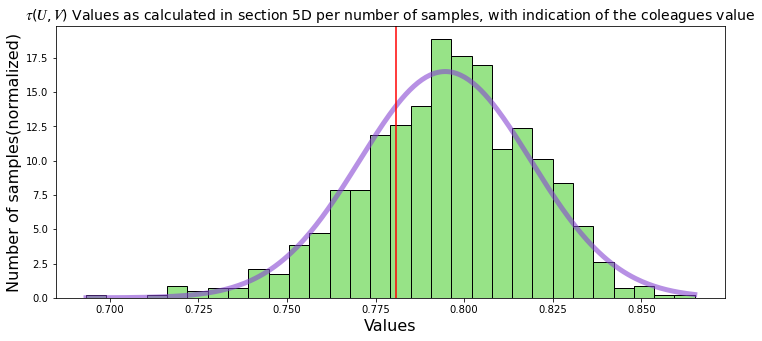

In [32]:
df=pd.read_csv("Kendall_data.csv",header=None)
df.head()
data=df.to_numpy()
data = data.T

kendall=stats.kendalltau(data[0],data[1])

norm_mean, norm_std, list_samples = calc_kendall_100(sample, 100)
arr = np.array(list_samples)

#z = (kendall[0]-norm_mean)/(norm_std/math.sqrt(100))
z = (kendall[0]-norm_mean)/(norm_std)

print(f"Our confidence in rejecting the coleague's claim is:{100-stats.norm.cdf(z)*100*2}%")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
sns.histplot(x=list_samples, ax=ax, bins=30, data=list_samples, color="#74DA5F", stat='density')
plt.title(r'$𝜏(𝑈,𝑉)$ Values as calculated in section 5D per number of samples, with indication of the coleagues value', fontsize = 14 )
ax.set_xlabel('Values', size=16)
ax.set_ylabel('Number of samples(normalized)', size=16)
x_range = np.linspace(arr.min(), arr.max(), 300)
ax.plot(x_range, stats.norm.pdf(x_range, norm_mean, norm_std),'#8747D2', lw=5, alpha=0.6)
plt.axvline(x=kendall[0],color='red')

### Explanation:

In  section 5D, we took 1000 different samples of 100 points out of the 10M points sampled from the data given to us, and calculated their Kendall correlation value (values presented on the histogram above).

In this section, we calculated the Kendall correlation value of our coleague's data, then we calculated it's Z value in comperison of the values from section 5D.
After we have the Z value, we can sum the probability of getting a similiar or closer to the true Kandalltau value, by using the CDF function which indicate the maximum confidence we can reject the coleague claim. In our case, very low confidence (around 40-50%).

The numerical answer is writen above, and is minory changing for each run of the calculation according to the random sampling made on section 5D.